## 3b) Usando la representación (2), genere un código que pueda generar funciones que satisfacen que:
### 1) sean periódicas y pares en $L^2([−1,1])$.
### 2) sean estríctamente crecientes en $L^2([0,1])$.
### 3) sean positivas e integren 1 en $L^2([0,1])$.

$$f(t) := f\left(t, \{\kappa_i\}_{i=0}^\infty\right) = \sum_{i=0}^\infty \kappa_i\varphi_i(t) \qquad\qquad (2)$$

donde $\{\varphi_i\}_{i=0}^\infty$ es una base ortogonal de $L^2(\Omega)$ y $\{\kappa_i\}_{i=0}^\infty$ una secuencia de números reales.

Importamos las librerías/funciones necesarias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definimos las funciones de la pregunta 3a) con la semilla fijada para hacer reproducibles los resultados.

In [2]:
def simular_seq_S_k(k, alpha, theta):
    return np.random.RandomState(0).beta(1-alpha, theta+alpha*np.arange(1, k+1))

def simular_seq_W_k(k, alpha, theta):
    Ss_k = simular_seq_S_k(k, alpha, theta)    
    return np.array([Ss_k[i-1] * np.prod(1-Ss_k[:(i-1)]) for i in range(1, k+1)])

Definimos funciones auxiliares:

In [3]:
def gen_f(phi, k, alpha, theta):
    '''
    Genera una función 'f' como la serie cortada al término 'k'-esimo,
    con la familia de funciones 'phi' y los pesos W_k(alpha, theta)
    '''
    pesos = simular_seq_W_k(k, alpha, theta)
    return lambda x: sum([peso_k * phi(i)(x) for i, peso_k in zip(range(k), pesos)])

integrate = np.vectorize(lambda f, x, h: np.trapz(f(np.arange(0, x, h) if x>0 else [0]), dx = h))

## 3b) 1) Sean periódicas y pares en $L^2([−1,1])$.

Utilizaremos la base ortogonal de $L^2([−1,1])$ de cosenos definidas por: $\varphi_n(x) = \cos(n \pi x)$.

In [4]:
cos = lambda k: np.vectorize(lambda x: np.cos(np.pi*k*x))

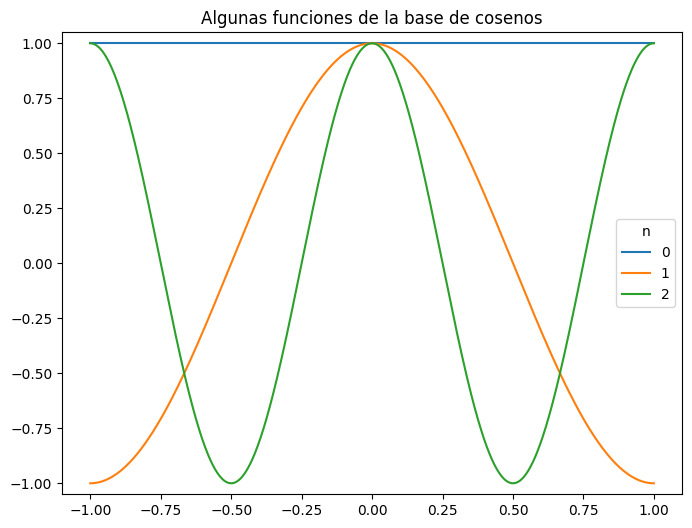

In [5]:
x = np.linspace(-1,1,1_000)

plt.figure(figsize=(8,6))
for k in np.arange(3):
    plt.plot(x, cos(k)(x), label=f'{k}')
plt.legend(title='n')
plt.ylim(-1.05,1.05)
plt.title('Algunas funciones de la base de cosenos');

Generemos un ejemplo de la función $f$ truncada con ciertos parámetros que generan la secuencia $W_k$.

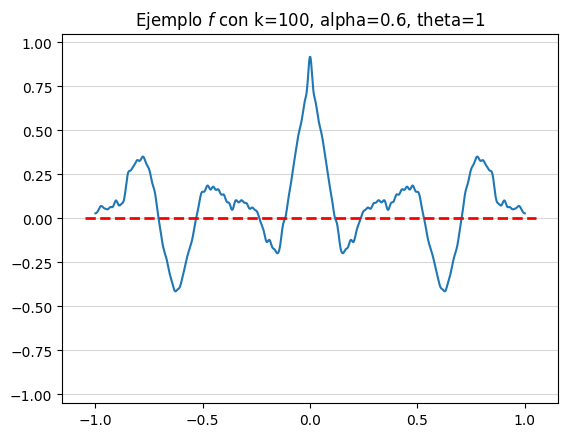

In [6]:
k, alpha, theta = 100, 0.6, 1

f = gen_f(cos, k, alpha, theta)

x = np.linspace(-1,1,1_000)
plt.plot(x, f(x))
plt.ylim(-1.05,1.05)
plt.plot([-1.05,1.05], [0,0], ls='--', lw=2, c='r')
plt.grid(alpha=0.5, axis='y')
plt.title(f'Ejemplo $f$ con {k=}, {alpha=}, {theta=}');

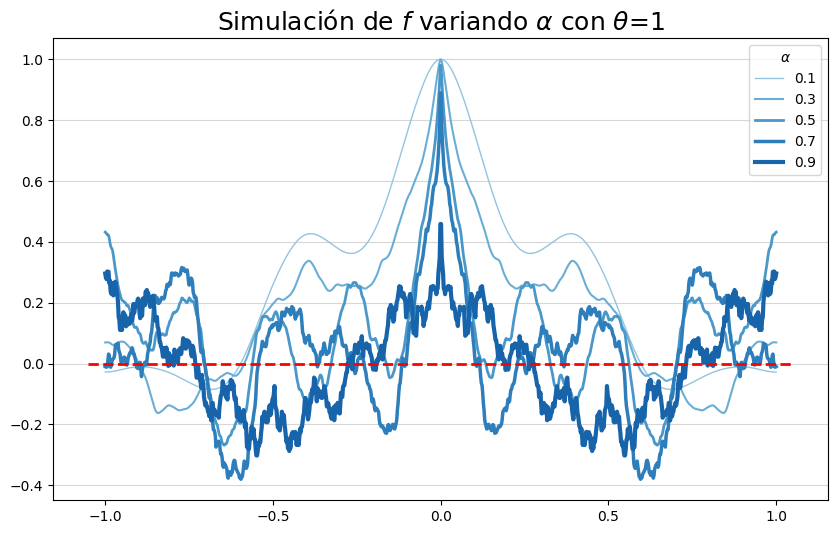

In [7]:
k, theta = 1000, 1
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]

x = np.linspace(-1,1,1_000)
plt.figure(figsize=(10,6))
for i,alpha in enumerate(alphas):
    f = gen_f(cos, k, alpha, theta)
    plt.plot(x, f(x), label=f'{alpha}', lw=i/2+1, c=plt.cm.Blues((i+4)/(2*len(alphas))))
plt.title(f'Simulación de $f$ variando $\\alpha$ con $\\theta$={theta}', size=18)
plt.plot([-1.05,1.05], [0,0], ls='--', lw=2, c='r')
plt.grid(alpha=0.5, axis='y')
plt.legend(title=r'$\alpha$')
path = 'C:/Users/Aleja/OneDrive - Universidad Técnica Federico Santa María/Material universidad/10sem 2023-2/MAT468/MAT468_github/certamen/P3/'
plt.savefig(path+'P3b1_alphas.png');

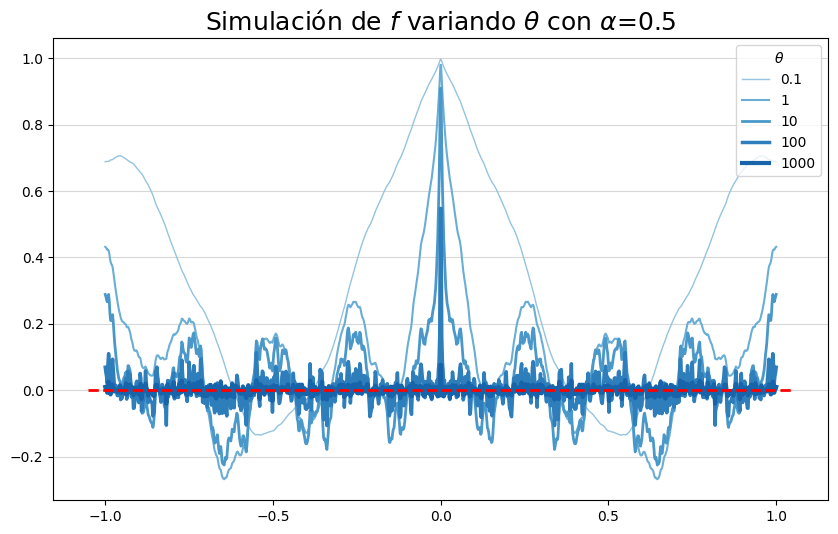

In [8]:
k, alpha = 1000, .5
thetas = [0.1, 1, 10, 100, 1000]

x = np.linspace(-1,1,1_000)
plt.figure(figsize=(10,6))
for i,theta in enumerate(thetas):
    f = gen_f(cos, k, alpha, theta)
    plt.plot(x, f(x), label=f'{theta}', lw=i/2+1, c=plt.cm.Blues((i+4)/(2*len(thetas))))

plt.plot([-1.05,1.05], [0,0], ls='--', lw=2, c='r')
#plt.ylim(-1.05,1.05)
plt.title(f'Simulación de $f$ variando $\\theta$ con $\\alpha$={alpha}', size=18)
plt.grid(alpha=0.5, axis='y')
plt.legend(loc='upper right', title=r'$\theta$')
plt.savefig(path+'P3b1_thetas.png');

## 3b) 2) Sean estríctamente crecientes en $L^2([0,1])$.

Para generar funciones con las características requeridas haciendo uso de la representación (2), haremos uso de una función $g\geq 0$ generando funciones de la siguiente forma: $$F(x) = \int_0^x g(f(t))\mathrm{d}t$$
como $g\geq0$ tenemos que $F$ es creciente.

Utilizaremos la base ortogonal de $L^2([0,1])$ de senos definidas por: $\varphi_n(x) = \sin(2n \pi x)$. Además, por simplicidad usaremos $g(x)=x^2$.

In [9]:
sin = lambda k: np.vectorize(lambda x: np.sin(2 * np.pi * k * x))
g = lambda x: x**2

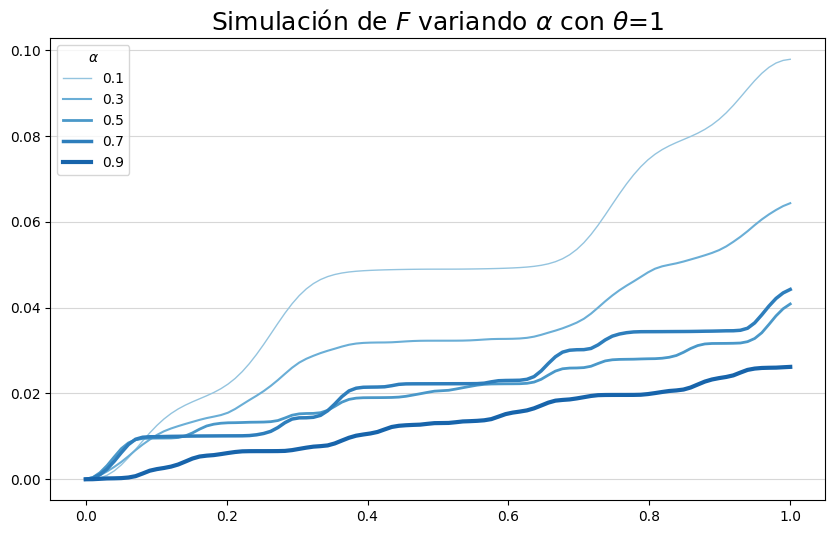

In [10]:
x = np.linspace(0,1,100)
h = 0.01

k, theta_ = 100, 1
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]

plt.figure(figsize=(10,6))
for i,alpha in enumerate(alphas):
    f = lambda x: g(gen_f(sin, k, alpha, theta_)(x))
    plt.plot(x, integrate(f,x,h),
             label=f'{alpha}', lw=i/2+1,
             c=plt.cm.Blues((i+4)/(2*len(alphas))))
    
plt.title(f'Simulación de $F$ variando $\\alpha$ con $\\theta$={theta_}', size=18)
plt.grid(alpha=0.5, axis='y')
plt.legend(title=r'$\alpha$')
plt.savefig(path+'P3b2_alphas.png');   

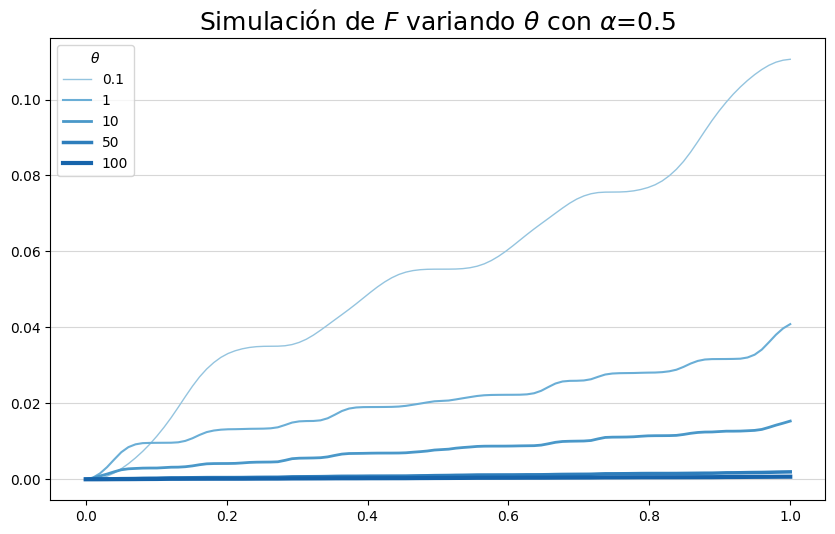

In [11]:
x = np.linspace(0,1,100)
h = 0.01

k, alpha_ = 100, .5
thetas = [0.1, 1, 10, 50, 100]

plt.figure(figsize=(10,6))
for i,theta in enumerate(thetas):
    f = lambda x: g(gen_f(sin, k, alpha_, theta)(x))
    plt.plot(x, integrate(f,x,h),
             label=f'{theta}', lw=i/2+1,
             c=plt.cm.Blues((i+4)/(2*len(thetas))))

plt.title(f'Simulación de $F$ variando $\\theta$ con $\\alpha$={alpha_}', size=18)
plt.grid(alpha=0.5, axis='y')
plt.legend(title=r'$\theta$')
plt.savefig(path+'P3b2_thetas.png');

## 3b) 3) Sean positivas e integren 1 en $L^2([0,1])$.

Para generar funciones con estas características, generamos $f$ con la representación (2) y luego la transformamos componiendo con $g\geq 0$ una función a elegir. Para imponer que integre 1, normalizamos por su área en el intervalo $[0,1]$,
$$G(x) = \frac{1}{\int_0^1 g(f(t))\mathrm{d}t}g(f(x)).$$

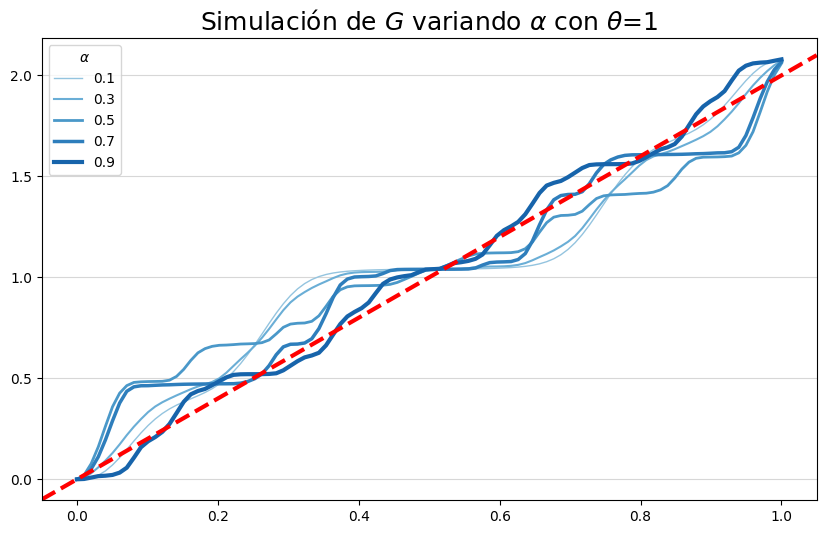

In [12]:
x = np.linspace(0,1,100)
h = 0.01

k, theta_ = 100, 1
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]

plt.figure(figsize=(10,6))
for i,alpha in enumerate(alphas):
    f = lambda x: g(gen_f(sin, k, alpha, theta_)(x))
    A = np.trapz([integrate(f,x,h) for x in np.arange(0,1,h)], dx=h)
    plt.plot(x, integrate(f,x,h)/A,
             label=f'{alpha}', lw=i/2+1,
             c=plt.cm.Blues((i+4)/(2*len(alphas))))
plt.axline((0,0), slope=2, c='r', lw=3, ls='--')
plt.title(f'Simulación de $G$ variando $\\alpha$ con $\\theta$={theta_}', size=18)
plt.grid(alpha=0.5, axis='y')
plt.legend(title=r'$\alpha$')
plt.savefig(path+'P3b3_alphas.png');

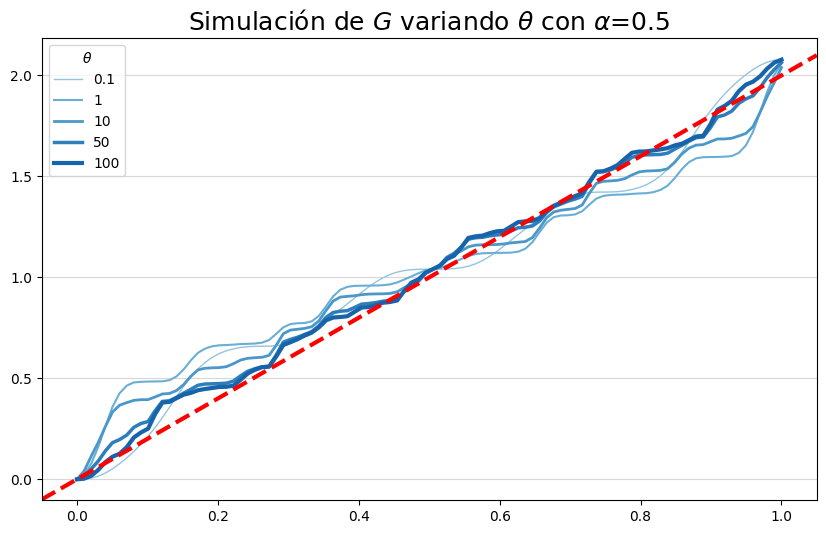

In [13]:
x = np.linspace(0,1,100)
h = 0.01

k, alpha_ = 100, .5
thetas = [0.1, 1, 10, 50, 100]

plt.figure(figsize=(10,6))
for i,theta in enumerate(thetas):
    f = lambda x: g(gen_f(sin, k, alpha_, theta)(x))
    A = np.trapz([integrate(f,x,h) for x in np.arange(0,1,h)], dx=h)
    plt.plot(x, integrate(f,x,h)/A,
             label=f'{theta}', lw=i/2+1,
             c=plt.cm.Blues((i+4)/(2*len(thetas))))
plt.axline((0,0), slope=2, c='r', lw=3, ls='--')
plt.title(f'Simulación de $G$ variando $\\theta$ con $\\alpha$={alpha_}', size=18)
plt.grid(alpha=0.5, axis='y')
plt.legend(title=r'$\theta$')
plt.savefig(path+'P3b3_thetas.png');